# QuTiP Example: Superoperators, Pauli Basis and Channel Contraction

[Christopher Granade](http://www.cgranade.com/) <br>
Institute for Quantum Computing
$\newcommand{\ket}[1]{\left|#1\right\rangle}$
$\newcommand{\bra}[1]{\left\langle#1\right|}$
$\newcommand{\cnot}{{\scriptstyle \rm CNOT}}$
$\newcommand{\Tr}{\operatorname{Tr}}$

## Introduction

In this notebook, we will demonstrate the ``tensor_contract`` function, which contracts one or more pairs of indices of a Qobj. This functionality can be used to find rectangular superoperators that implement the partial trace channel $S(\rho) = \Tr_2(\rho)$, for instance. Using this functionality, we can quickly turn a system-environment representation of an open quantum process into a superoperator representation.

## Preamble

### Features

We enable a few features such that this notebook runs in both Python 2 and 3.

In [1]:
from __future__ import division, print_function

### Imports

In [2]:
import numpy as np
import qutip as qt

from qutip.ipynbtools import version_table

### Plotting Support

In [3]:
%matplotlib inline

### Settings

In [4]:
qt.settings.colorblind_safe = True

## Superoperator Representations and Plotting

We start off by first demonstrating plotting of superoperators, as this will be useful to us in visualizing the results of a contracted channel.

In particular, we will use Hinton diagrams as implemented by [``qutip.visualization.hinton``](http://qutip.org/docs/3.0.1/apidoc/functions.html#qutip.visualization.hinton), which
show the real parts of matrix elements as squares whose size and color both correspond to the magnitude of each element. To illustrate, we first plot a few density operators.

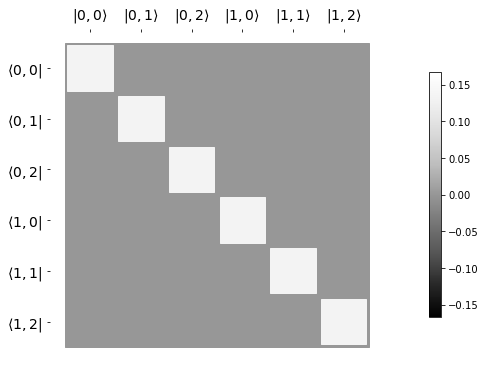

In [5]:
qt.visualization.hinton(qt.identity([2, 3]).unit());

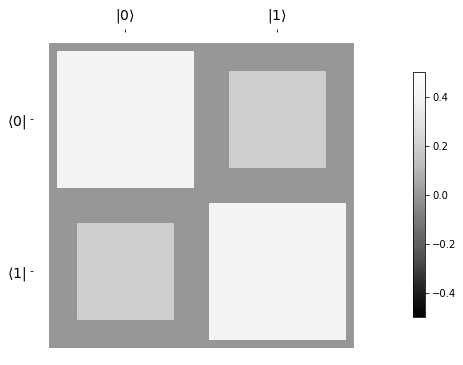

In [6]:
qt.visualization.hinton(qt.Qobj([
    [1, 0.5],
    [0.5, 1]
]).unit());

We show superoperators as matrices in the *Pauli basis*, such that any Hermicity-preserving map is represented by a real-valued matrix. This is especially convienent for use with Hinton diagrams, as the plot thus carries complete information about the channel.

As an example, conjugation by $\sigma_z$ leaves $\mathbb{1}$ and $\sigma_z$ invariant, but flips the sign of $\sigma_x$ and $\sigma_y$. This is indicated in Hinton diagrams by a negative-valued square for the sign change and a positive-valued square for a +1 sign.

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]


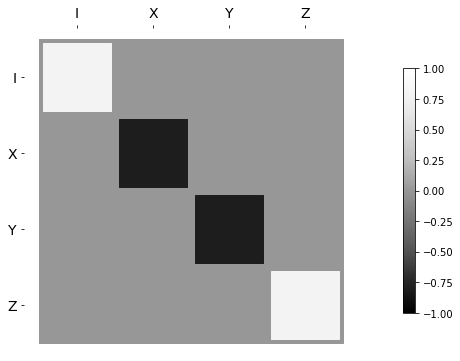

In [8]:
qt.visualization.hinton(qt.to_super(qt.sigmaz()));
print(qt.to_super(qt.sigmaz()))

In [7]:
help(qt.to_super)

Help on function to_super in module qutip.superop_reps:

to_super(q_oper)
    Converts a Qobj representing a quantum map to the supermatrix (Liouville)
    representation.
    
    Parameters
    ----------
    q_oper : Qobj
        Superoperator to be converted to supermatrix representation. If
        ``q_oper`` is ``type="oper"``, then it is taken to act by conjugation,
        such that ``to_super(A) == sprepost(A, A.dag())``.
    
    Returns
    -------
    superop : Qobj
        A quantum object representing the same map as ``q_oper``, such that
        ``superop.superrep == "super"``.
    
    Raises
    ------
    TypeError
        If the given quantum object is not a map, or cannot be converted
        to supermatrix representation.



As a couple more examples, we also consider the supermatrix for a Hadamard transform and for $\sigma_z \otimes H$.

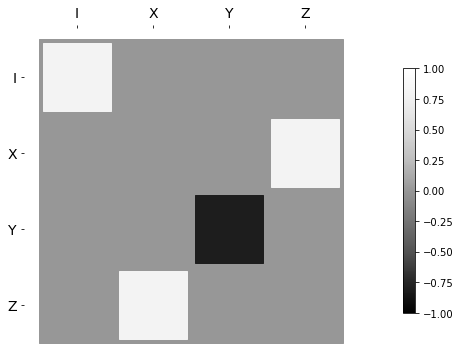

In [14]:
from qutip.qip.operations import gates # to fix the deprecated qt.hadamard_transform()
qt.visualization.hinton(qt.to_super(gates.hadamard_transform()));
#print(qt.to_super(qt.hadamard_transform()))

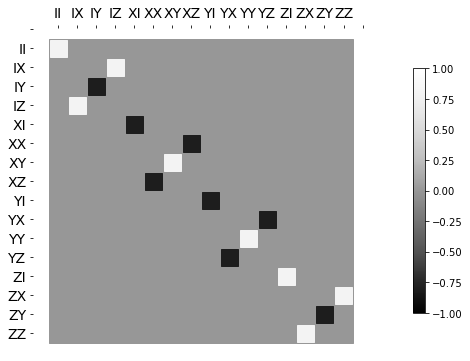

In [19]:
qt.visualization.hinton(qt.to_super(qt.tensor(qt.sigmaz(), gates.hadamard_transform())));
#print(qt.to_super(qt.tensor(qt.sigmaz(), gates.hadamard_transform())))

## Reduced Channels

As an example of tensor contraction, we now consider the map $S(\rho) = \Tr_2[\cnot (\rho \otimes \ket{0}\bra{0}) \cnot^\dagger]$.
We can think of the $\cnot$ here as a system-environment representation of an open quantum process, in which an environment register is prepared in a state $\rho_{\text{anc}}$, then a unitary acts jointly on the system of interest and environment. Finally, the environment is traced out, leaving a *channel* on the system alone. In terms of [Wood diagrams](http://arxiv.org/abs/1111.6950), this can be represented as the composition of a preparation map, evolution under the system-environment unitary, and then a measurement map.

![](files/sprep-wood-diagram.png)

The two tensor wires on the left indicate where we must take a tensor contraction to obtain the measurement map. Numbering the tensor wires from 0 to 3, this corresponds to a ``tensor_contract`` argument of ``(1, 3)``.

In [10]:
s_meas = qt.tensor_contract(qt.to_super(qt.identity([2, 2])), (1, 3))
s_meas

Quantum object: dims = [[[2], [2]], [[2, 2], [2, 2]]], shape = (4, 16), type = other
Qobj data =
[[ 1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]]

Meanwhile, the ``super_tensor`` function implements the swap on the right, such that we can quickly find the preparation map.

In [11]:
q = qt.tensor(qt.identity(2), qt.basis(2))
s_prep = qt.sprepost(q, q.dag())
s_prep

Quantum object: dims = [[[2, 2], [2, 2]], [[2], [2]]], shape = (16, 4), type = other
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

For a $\cnot$ system-environment model, the composition of these maps should give us a completely dephasing channel. The channel on both qubits is just the superunitary $\cnot$ channel:

(<matplotlib.figure.Figure at 0x11882c7f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118b74898>)

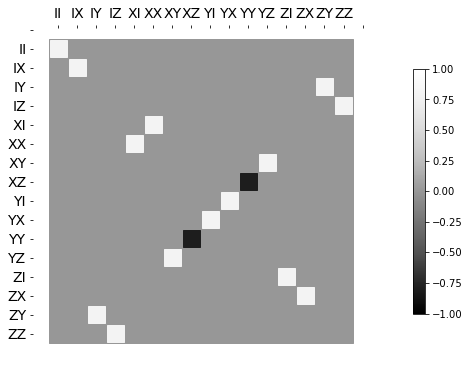

In [12]:
qt.visualization.hinton(qt.to_super(qt.cnot()))

We now complete by multiplying the superunitary $\cnot$ by the preparation channel above, then applying the partial trace channel by contracting the second and fourth index indices. As expected, this gives us a dephasing map.

In [13]:
qt.tensor_contract(qt.to_super(qt.cnot()), (1, 3)) * s_prep

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]]

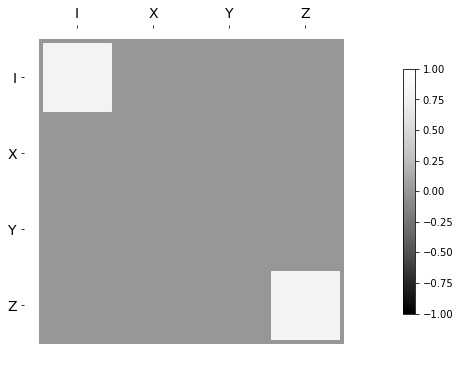

In [14]:
qt.visualization.hinton(qt.tensor_contract(qt.to_super(qt.cnot()), (1, 3)) * s_prep);

## Epilouge

In [15]:
version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
